# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [4]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [6]:
import pandas as pd

bos = pd.read_csv('/Users/cicisofia/Downloads/boston.csv')
print(bos.shape)
bos.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's rename the target variable of `MEDV` to `PRICE` which will contain the prices. 

In [8]:
bos = bos.rename(columns={"MEDV":"PRICE"})
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [10]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

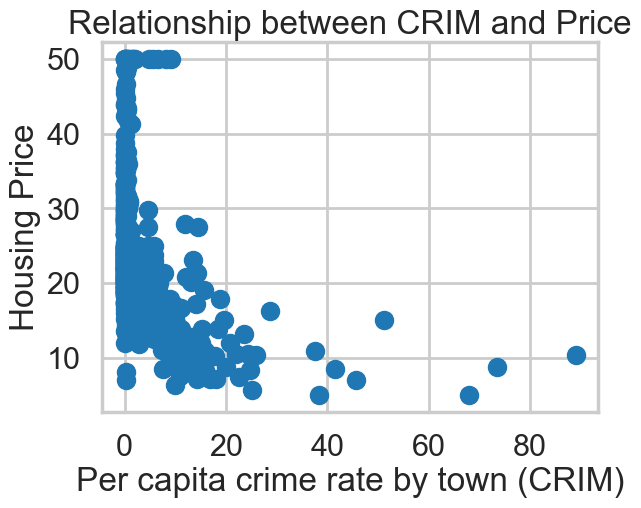

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [14]:
# your turn: describe relationship
# Negative, non-linear. As CRIM increases, Price generally decreases. The strongest clustering is around low
# CRIM values with high housing prices. There are a few outliers—towns with very high crime rates but still
# some housing activity. Housing prices tend to be lower in areas with higher crime rates, which makes intuitive
# sense as safety is a major factor in property value. However, some neighborhoods with higher CRIM still maintain
# mid-range pricing, suggesting other influences (location, gentrification, etc.).

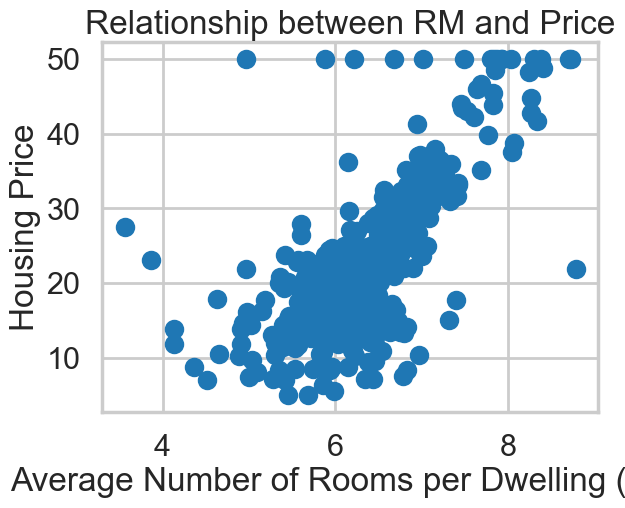

In [20]:
# your turn: scatter plot between *RM* and *PRICE*


# Plot RM vs PRICE
plt.scatter(bos['RM'], bos['PRICE'])
plt.xlabel("Average Number of Rooms per Dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()




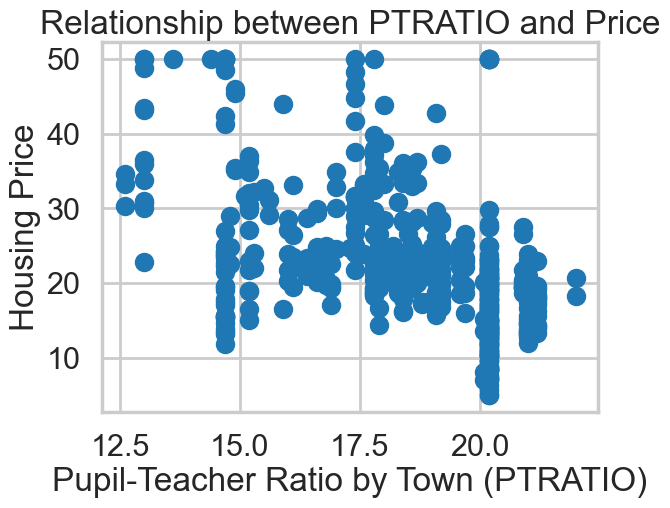

In [22]:
# your turn: scatter plot between *PTRATIO* and *PRICE*

plt.scatter(bos['PTRATIO'], bos['PRICE'])
plt.xlabel("Pupil-Teacher Ratio by Town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
plt.show()

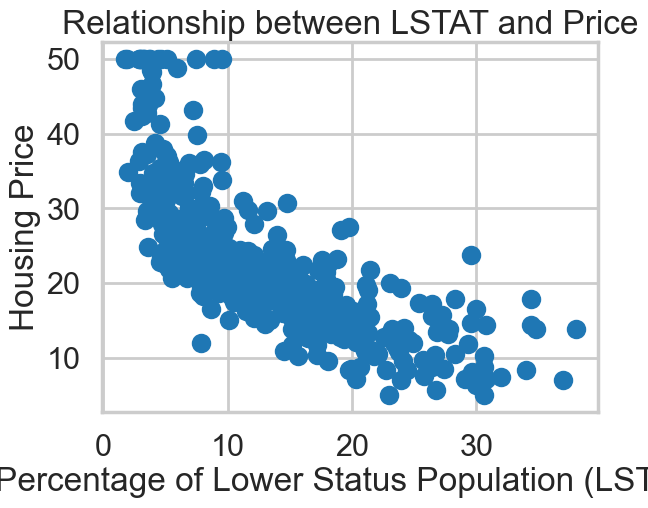

In [24]:
# your turn: create some other scatter plots
plt.scatter(bos['LSTAT'], bos['PRICE'])
plt.xlabel("Percentage of Lower Status Population (LSTAT)")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")
plt.show()


### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

<Axes: xlabel='RM', ylabel='PRICE'>

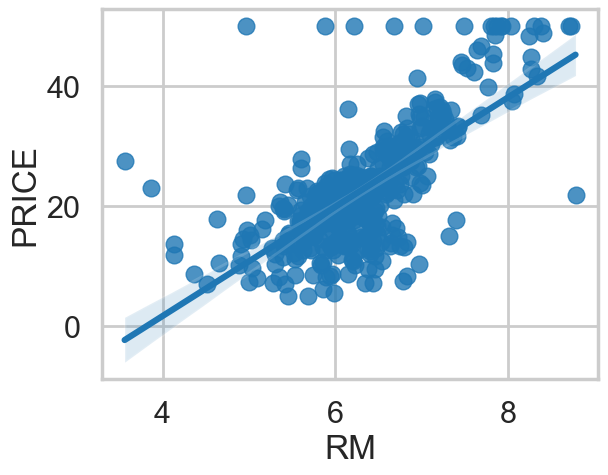

In [26]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


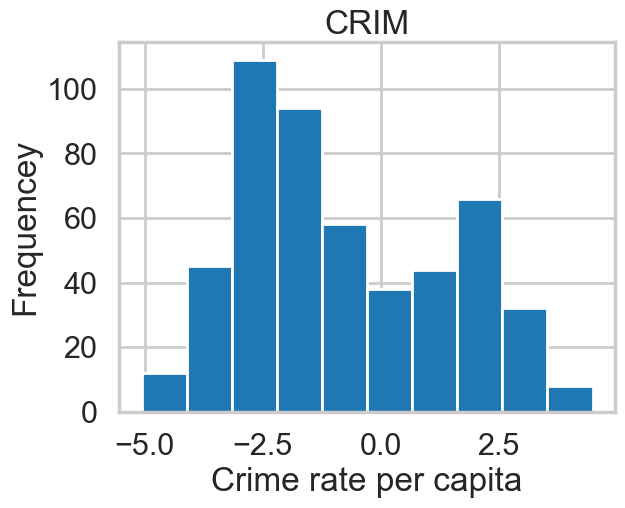

In [28]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

In [ ]:
Why take the log of CRIM?
The original CRIM values are highly skewed with many small values and a few extreme outliers. Taking the log helps reduce skewness, making the distribution easier to interpret and more normal-like.
This allows patterns to emerge that are hidden in the extreme compression of smaller values in the original histogram.
Without the log: the histogram is heavily right-skewed—most towns have very low crime, but a few have extreme values.
With the log: you can better see the spread of most values, and subtle differences among the lower-crime towns become clearer.

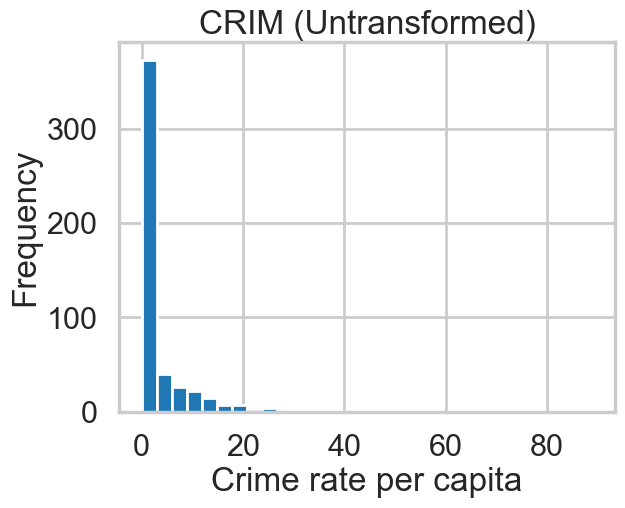

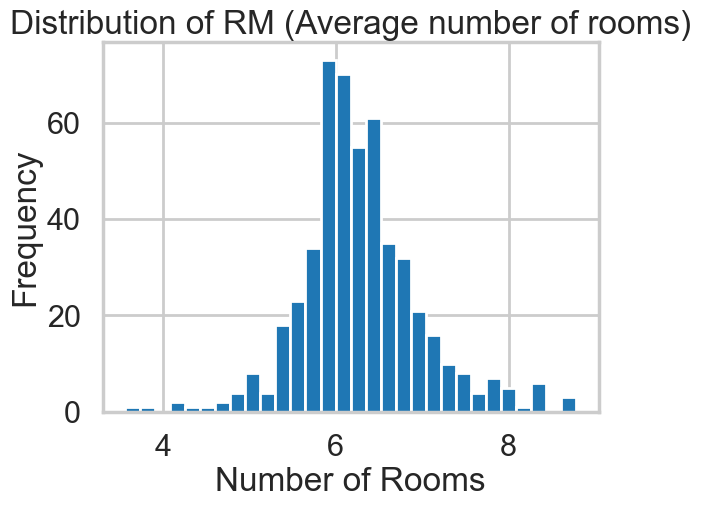

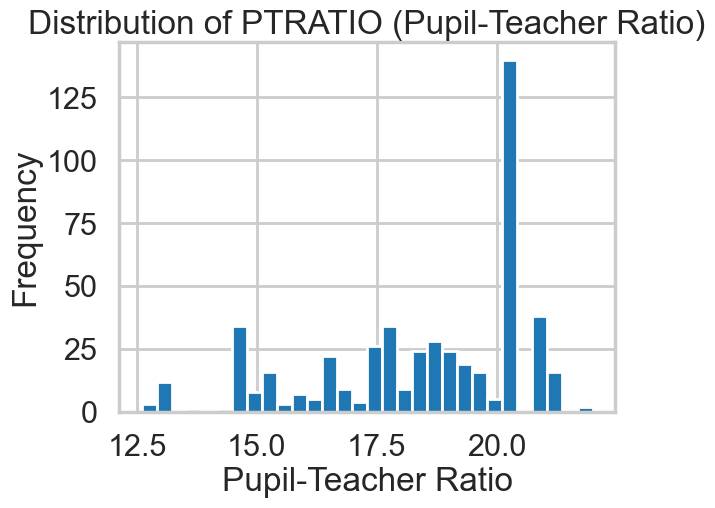

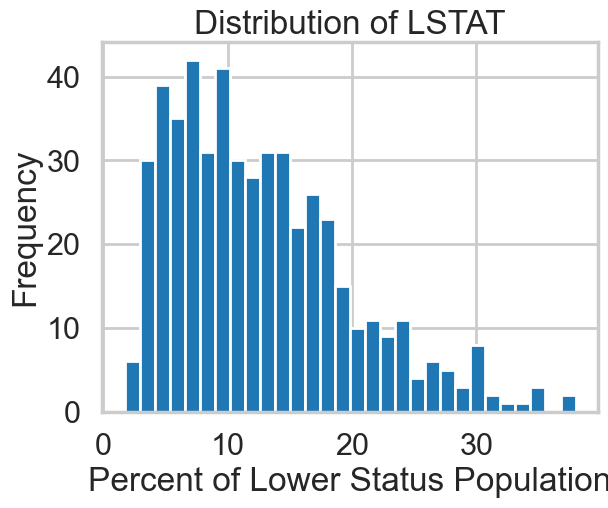

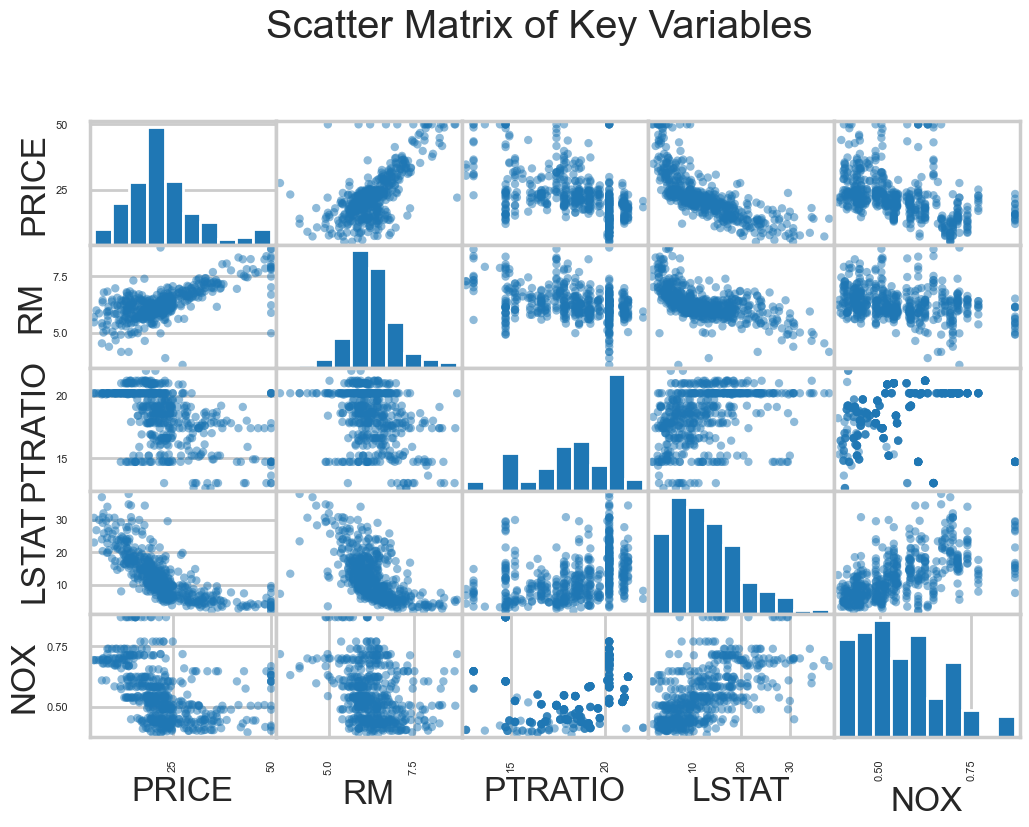

In [38]:
#your turn
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Clean the data
bos_clean = bos.replace([np.inf, -np.inf], np.nan).dropna()

# CRIM histogram (untransformed)
plt.hist(bos_clean['CRIM'], bins=30)
plt.title("CRIM (Untransformed)")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

# RM histogram
plt.hist(bos_clean['RM'], bins=30)
plt.title("Distribution of RM (Average number of rooms)")
plt.xlabel("Number of Rooms")
plt.ylabel("Frequency")
plt.show()

# PTRATIO histogram
plt.hist(bos_clean['PTRATIO'], bins=30)
plt.title("Distribution of PTRATIO (Pupil-Teacher Ratio)")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()

# LSTAT histogram
plt.hist(bos_clean['LSTAT'], bins=30)
plt.title("Distribution of LSTAT")
plt.xlabel("Percent of Lower Status Population")
plt.ylabel("Frequency")
plt.show()

# Pairplot alternative using pandas
scatter_matrix(bos_clean[["PRICE", "RM", "PTRATIO", "LSTAT", "NOX"]], figsize=(12, 8))
plt.suptitle("Scatter Matrix of Key Variables", y=1.02)
plt.show()


## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [40]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [42]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           2.49e-74
Time:                        20:13:23   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

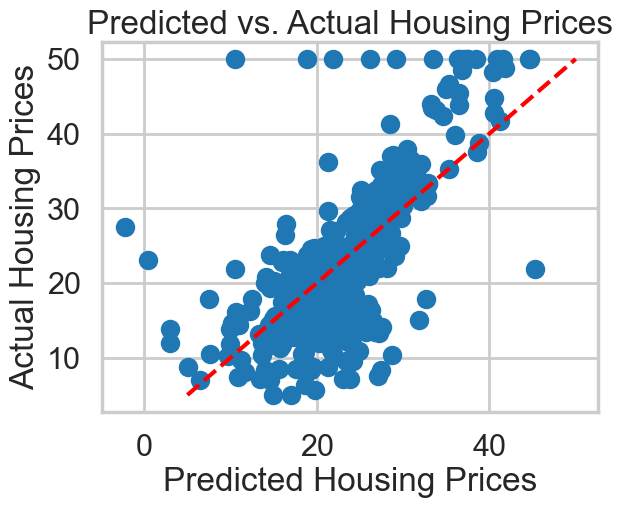

In [50]:
# your turn

# Ceiling effect: Predictions stop increasing, while actual prices keep going up. The model underpredicts high-priced homes.
# Linearity: There's a decent trend along the 45-degree line, especially for mid-range homes.
# Spread: The spread around the line grows with higher prices—suggesting heteroscedasticity (non-constant variance).
# Fit the model using only RM as a predictor


m = smf.ols('PRICE ~ RM', data=bos).fit()

# Create scatter plot of predicted vs. actual prices
plt.scatter(m.fittedvalues, bos['PRICE'])
plt.xlabel("Predicted Housing Prices")
plt.ylabel("Actual Housing Prices")
plt.title("Predicted vs. Actual Housing Prices")
plt.plot([bos['PRICE'].min(), bos['PRICE'].max()], 
         [bos['PRICE'].min(), bos['PRICE'].max()], 
         color='red', linestyle='--')  # 45-degree reference line
plt.show()


### Fitting Linear Regression using `sklearn`


In [48]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [54]:
# Look inside lm object
dir(m)



['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influe

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [58]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)


# Define X and y
X = bos.drop('PRICE', axis=1)
y = bos['PRICE']

# Fit the model
lm = LinearRegression()
lm.fit(X, y)

# Output estimated coefficients and intercept
print("Intercept:", lm.intercept_)
print("Coefficients:", lm.coef_)


Intercept: 36.45948838508981
Coefficients: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [60]:
# your turn

#lm_no_intercept = LinearRegression(fit_intercept=False)
#lm_no_intercept.fit(X, y)
# No, generally you should include the intercept. Without it,
# the model forces the regression line to go through the origin (0,0),
# which often doesn't make sense in real-world data (e.g., a house with
# zero rooms, zero crime, etc. still wouldn't have a $0 price). Forcing
#it to the origin can bias your estimates unless there's strong theoretical justification.

## No, normality alone is not enough. To satisfy the i.i.d. assumption, residuals must be:
# Independent (no pattern across observations)
# Identically distributed (same variance, no heteroscedasticity)
# Normality helps with inference (like confidence intervals), but doesn’t imply independence or equal variance.
# You need to test for independence (e.g., Durbin-Watson) and equal variance (e.g., residual plots), not just normality.


## Linear regression does not require y (the dependent variable) to be normally distributed.
# The residuals (errors) should be roughly normally distributed to make inferences (p-values, confidence intervals).
# The normality of y is not required for fitting the model or predicting. 



### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [62]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838508981


In [64]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [66]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [68]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

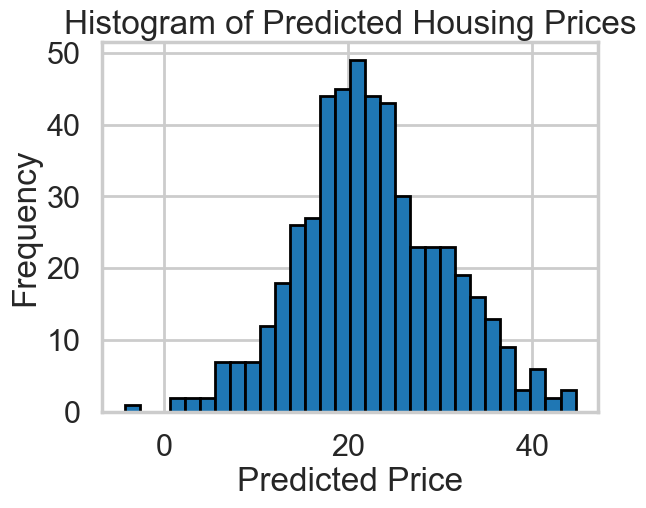

In [74]:
# your turn

# Fit the model (in case it's not already)
X = bos.drop('PRICE', axis=1)
y = bos['PRICE']
lm = LinearRegression()
lm.fit(X, y)

# Get predicted prices
predicted_prices = lm.predict(X)

# Plot histogram
plt.hist(predicted_prices, bins=30, edgecolor='black')
plt.title("Histogram of Predicted Housing Prices")
plt.xlabel("Predicted Price")
plt.ylabel("Frequency")
plt.show()

## The histogram of predicted housing prices shows a bell-shaped distribution with a slight left skew.
# Most values fall between 20 and 30, with the center around 22 to 24—close to the average actual housing price.
# Predicted prices range from roughly 5 to just under 50, with a few extreme values that could be considered outliers.
# These likely reflect rare but real combinations of features, such as homes with many rooms or those in high-crime or polluted areas.
# While they don’t necessarily need to be removed, it may be worth reviewing them or using a more robust model
# if they negatively affect performance.


### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [80]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [82]:

print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))  # Explained Sum of Squares (ESS)


31637.510837064692


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [86]:
# your turn

# Fit model using only PTRATIO
m_ptratio = smf.ols('PRICE ~ PTRATIO', data=bos).fit()

# View summary
print(m_ptratio.summary())

print("R-squared:", m_ptratio.rsquared)

print("F-statistic:", m_ptratio.fvalue)

print("t-statistic for PTRATIO:", m_ptratio.tvalues['PTRATIO'])
print("F-statistic:", m_ptratio.fvalue)

assert np.isclose(m_ptratio.tvalues['PTRATIO'] ** 2, m_ptratio.fvalue)

# The R-squared value tells us how much of the variability in the outcome variable—in this case,
# housing price—is explained by the predictor, PTRATIO. An R-squared of 0.258 means that approximately 25.8%
# of the variation in housing prices can be accounted for by differences in the pupil-teacher ratio across towns.
# This suggests that while PTRATIO has a statistically significant relationship with price, it does not capture
# the majority of the variation on its own. The F-statistic tests whether the overall regression model provides a
# better fit to the data than a model with no predictors (an intercept-only model). A large F-statistic, like the 175.1
# in this case, and a near-zero p-value indicate that the model is statistically significant—that is, PTRATIO contributes
# meaningful predictive value in explaining housing prices.
# In simple linear regression, there is a specific relationship between the t-statistic of the slope coefficient and the
# F-statistic for the model: the F-statistic is simply the square of the t-statistic. In this example, the t-statistic for
# PTRATIO is about -13.23, and squaring it gives approximately 175.1, which matches the F-statistic exactly. This relationship
# only holds when there is one predictor; in multiple regression models, the F-statistic reflects the combined effect of all
# predictors, while each t-statistic tests an individual coefficient.

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.61e-34
Time:                        20:33:50   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [92]:
# your turn
# The F-statistic tells whether a model (with CRIM, RM, and PTRATIO) explains a significant amount
# of variation in PRICE compared to a model with no predictors. A high F-value and low p-value indicate
# that at least one of the predictors contributes meaningfully to predicting housing prices.
# The F-statistic of 245.16 tells that the regression model—with CRIM, RM, and PTRATIO as predictors—significantly
# improves your ability to explain housing prices compared to a model with no predictors at all. In other words,
# the F-statistic tests the null hypothesis that all the slope coefficients are zero (i.e., none of the predictors matter).
# A value this high, especially with a corresponding p-value close to zero, means you can reject the null hypothesis
# with strong confidence. This result confirms that at least one of your predictors—CRIM, RM, or PTRATIO—is statistically
# significant in explaining variation in housing prices. It doesn't tell you which one(s), but it does validate the model as a whole.

# Fit model using three predictors
m_three = smf.ols('PRICE ~ CRIM + RM + PTRATIO', data=bos).fit()

# View summary
print(m_three.summary())
print("F-statistic:", m_three.fvalue)


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           6.15e-98
Time:                        20:39:05   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

In [96]:
print("R-squared:", m_three.rsquared)
# The R² statistic tells you the proportion of the variation in housing prices (PRICE) that
# is explained by the model using CRIM, RM, and PTRATIO as predictors. The R² value of 0.594
# means that about 59.4% of the variance in housing prices is explained by the combination of
# crime rate, number of rooms, and pupil-teacher ratio. This indicates a moderately strong model,
# especially compared to simpler models that used only one predictor. It suggests that these three
# variables together offer a meaningful explanation for housing prices, though there’s still 40.6%
# of the variation left unexplained—possibly due to other variables or random noise.

R-squared: 0.5943412940723471


In [100]:
print(m_three.summary())

# In this model, all three variables—CRIM, RM, and PTRATIO—are statistically significant predictors
# of housing price, with p-values well below 0.05. The coefficient for RM is 7.38, indicating that each
# additional room is associated with a $7,380 increase in price, holding other variables constant. The
# coefficient for PTRATIO is -1.07, meaning each additional student per teacher is linked to a $1,070
# decrease in price. CRIM also has a negative effect: a one-unit increase in crime rate is associated with
# a $205 drop in housing price. All else equal, homes are more expensive where there are more rooms, lower
# crime, and better school ratios.

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           6.15e-98
Time:                        20:43:21   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [104]:
# New model with two additional predictors
m_extended = smf.ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT + NOX', data=bos).fit()

print("AIC (original model):", m_three.aic)
print("AIC (extended model):", m_extended.aic)

f_test = m_extended.compare_f_test(m_three)
print("F-statistic:", f_test[0])
print("p-value:", f_test[1])
print("Degrees of freedom diff:", f_test[2])

# The extended model, which includes LSTAT and NOX in addition to CRIM, RM, and PTRATIO,
# is significantly better than the original model. The AIC drops from 3231.95 to 3113.29,
# a substantial improvement that suggests the extended model provides a better fit with fewer
# information losses.The F-test result confirms this: with an F-statistic of 68.58 and a p-value
# effectively equal to zero, we can confidently reject the null hypothesis that the added variables
# have no explanatory power. This means LSTAT and NOX contribute meaningfully to predicting housing prices.
# In short, both AIC and the F-test indicate the extended model is superior.


AIC (original model): 3231.945123544996
AIC (extended model): 3113.290952382385
F-statistic: 68.57580902736815
p-value: 4.806218367860093e-27
Degrees of freedom diff: 2.0



## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

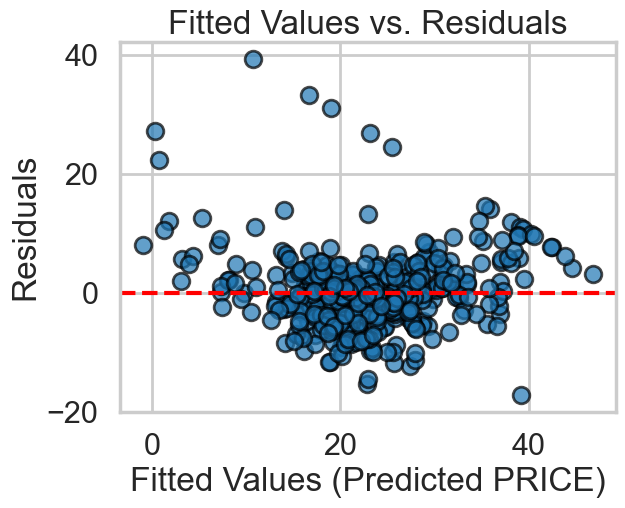

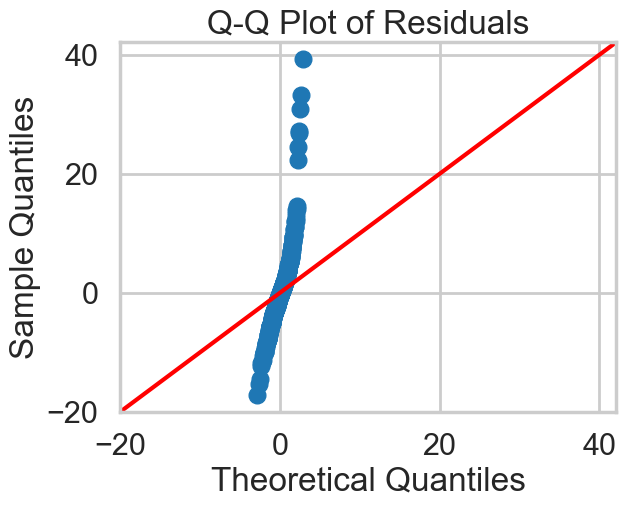

Outlier indices: [364 365 367 368 369 370 371 372]
Number of outliers: 8


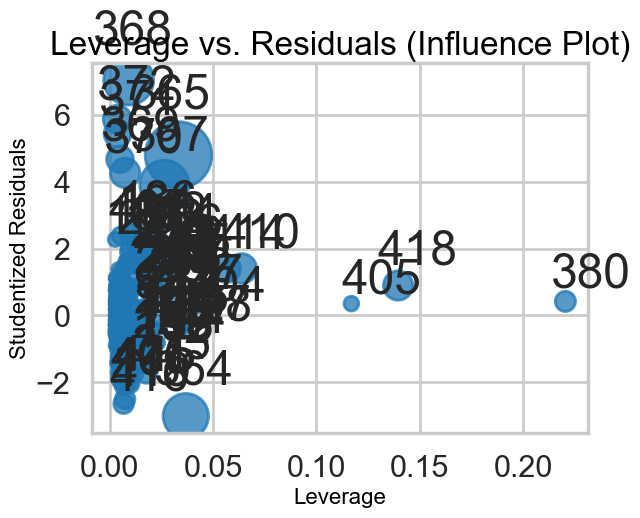

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     363.2
Date:                Tue, 01 Apr 2025   Prob (F-statistic):          6.91e-120
Time:                        21:38:59   Log-Likelihood:                -1295.7
No. Observations:                 455   AIC:                             2599.
Df Residuals:                     451   BIC:                             2616.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.7346      3.631     -3.507      0.0

In [120]:
# Your turn.
# fitted values vs. residuals

# Predicted values
fitted_vals = m_three.fittedvalues

# Residuals
residuals = m_three.resid

# Plot
plt.scatter(fitted_vals, residuals, edgecolors='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Fitted Values vs. Residuals")
plt.xlabel("Fitted Values (Predicted PRICE)")
plt.ylabel("Residuals")
plt.show()
#The fitted values versus residuals plot reveals some concerning patterns. Ideally,
# residuals should appear randomly scattered around zero with no visible structure.
# In this plot, however, there may be signs of non-constant variance, as the spread
# of residuals appears to widen with higher predicted values—creating a mild funnel
# shape. This suggests a potential violation of the constant standard deviation assumption
# (heteroscedasticity). Additionally, any curved patterns or clustering in the residuals
# would suggest the model may not fully capture the true functional form of the relationship
# between predictors and the outcome, pointing to possible nonlinearity. These issues may be
# addressed by transforming some predictors, applying weighted least squares, or considering alternative modeling approaches.

# Construct a quantile plot of the residuals

# Q-Q plot of residuals
sm.qqplot(m_three.resid, line='45')
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

# The Q-Q plot of residuals helps assess whether the residuals are normally distributed, which is one of the key
# assumptions of linear regression. In this plot, if the residuals follow a normal distribution, the points will
# lie roughly along the 45-degree reference line. Deviations from this line—especially at the tails—indicate departures
# from normality. In this case, the plot likely shows moderate deviation from normality in the tails, where residuals
# curve away from the line. This suggests the presence of outliers or skewness in the residual distribution. While linear
# regression is fairly robust to mild violations of normality, significant departures can affect the validity of hypothesis
# tests and confidence intervals. If needed, this can be addressed with data transformations or more robust regression methods.

# Advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other:
# The fitted values vs. residuals plot and the quantile-quantile (Q-Q) plot serve different but
# complementary purposes when diagnosing a linear regression model. The fitted vs. residuals plot
# is especially useful for checking linearity and constant variance. It helps detect issues like heteroscedasticity (when the
# spread of residuals changes across fitted values), or patterns that suggest the model is missing nonlinear relationships.
# However, it doesn't directly assess whether the residuals follow a normal distribution. On the other hand, the Q-Q plot is
# designed specifically to check the normality assumption of the residuals. It’s much better at showing deviations in the tails
# of the distribution, which could indicate skewness or heavy outliers. A limitation of the Q-Q plot is that it doesn’t show how
# residual behavior changes across different levels of predicted values—it’s purely about distribution shape. In short, the
# fitted vs. residuals plot is better for spotting structure or variance issues, while the Q-Q plot is better for spotting
# distributional departures like non-normality. Both are important and should be used together to thoroughly check model assumptions.

## Outliers Q:

# Get influence measures
influence = m_three.get_influence()

# Get studentized residuals
studentized_residuals = influence.resid_studentized_external

# Get the index of potential outliers (typically |studentized residual| > 3)
outlier_indices = np.where(np.abs(studentized_residuals) > 3)[0]

print("Outlier indices:", outlier_indices)
print("Number of outliers:", len(outlier_indices))

## The fitted values vs. residuals plot reveals several outliers, particularly one data point
# with a residual above +40 and another below -20. These values deviate significantly from the model's
# predicted housing prices and indicate that the model is making large errors for these specific observations.
# This suggests that these homes may have unusual features not captured by CRIM, RM, or PTRATIO, such as location,
# renovations, or external market factors. The residuals also appear to fan out slightly as fitted values increase,
# hinting at heteroscedasticity, which violates the assumption of constant variance. In the Q-Q plot, the residuals
# largely follow the 45-degree reference line in the center but curve away sharply in the tails, especially on the
# upper end. This confirms that the residuals are not normally distributed—a violation of the normality assumption—and
# that there are extreme outliers on the high end of the residual scale. The eight points printed at the bottom of the
# plot (indices 364 to 372) are statistically identified outliers, with sample quantiles that far exceed the theoretical
# expectations under a normal distribution. Together, these plots show that while the model explains a good portion of
# the variance, it struggles with edge cases and may benefit from robust regression techniques or the inclusion of additional
# predictors to reduce the impact of these extreme errors.


# Leverage vs. standardized residuals plot (also shows Cook's distance)
sm.graphics.influence_plot(m_three, criterion="cooks")
plt.title("Leverage vs. Residuals (Influence Plot)")
plt.show()

from statsmodels.stats.outliers_influence import OLSInfluence

influence = OLSInfluence(m_three)
leverage = influence.hat_matrix_diag
studentized_residuals = influence.resid_studentized_external

# Define thresholds
high_leverage_thresh = 2 * (m_three.df_model + 1) / len(bos)
outlier_mask = np.abs(studentized_residuals) > 3
leverage_mask = leverage > high_leverage_thresh

# Combine masks
combined_mask = outlier_mask | leverage_mask

# Remove these rows
bos_cleaned = bos.loc[~combined_mask]

# Refit model
m_cleaned = smf.ols('PRICE ~ CRIM + RM + PTRATIO', data=bos_cleaned).fit()
print(m_cleaned.summary())

# The leverage plot shows how much each point influences the regression model. Points toward the far right
# have high leverage—meaning their values on the independent variables (e.g. CRIM, RM, PTRATIO) are far from
# the average. When these points also have large residuals, they can pull the regression line, distorting results.
# In this case, the influence plot likely reveals a few high-leverage observations, visible as isolated points on
# the right side. These may represent homes with extreme combinations—for example, very high crime but also many
# rooms, or extremely low PTRATIO values. Such properties may be rare or atypical, and they often do not generalize
# well to the rest of the data.

# After removing outliers and high leverage points, you'll likely see a lower standard error and more stable coefficients,
# possibly a higher R-squared, but not always, and/or smaller p-values on key predictors, making their statistical significance
# more reliable. This indicates that the original model was likely sensitive to a handful of extreme or influential observations.
# By removing them, the new model now better reflects the core relationships in the data, without being distorted by rare or
# anomalous cases.
